## Owais Aijaz 7610
## oa07610@st.habib.edu.pk

## CS/CE 457/464 Homework 06

In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('HousePricingData.csv')

In [3]:
df

,Id,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition,SalePrice
0,1,8450,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal,208500
1,2,9600,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal,181500
2,3,11250,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal,223500
3,4,9550,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml,140000
4,5,14260,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,6,5,1999,953,953,694,1647,0,0,2,1,3,1,1,2,Y,Normal,175000
1456,1457,13175,6,6,1978,1542,2073,0,2073,1,0,2,0,3,1,2,2,Y,Normal,210000
1457,1458,9042,7,9,1941,1152,1188,1152,2340,0,0,2,0,4,1,2,1,Y,Normal,266500
1458,1459,9717,5,6,1950,1078,1078,0,1078,1,0,1,0,2,1,0,1,Y,Normal,142125


In [4]:
df = df.drop(['Id'],axis=1)

### Question 01

In [15]:
X = df['GrLivArea']
Y = df['SalePrice']

#Fit the linear regression model
X = sm.add_constant(X)  #Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

#Print the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          4.52e-223
Time:                        20:08:33   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'SalePrice')

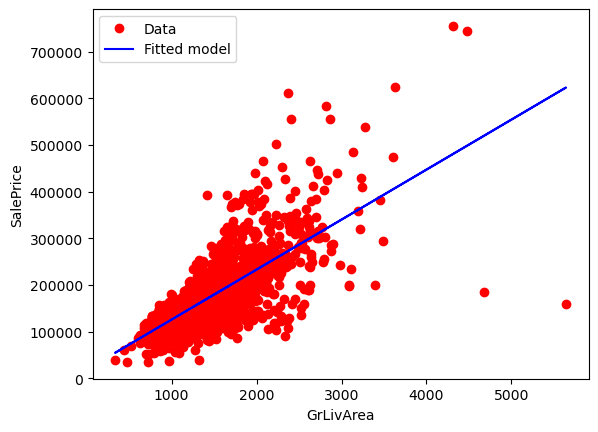

In [17]:
plt.plot(df['GrLivArea'].values, df['SalePrice'].values, 'ro')
plt.plot(df['GrLivArea'].values, model.fittedvalues.values, 'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [33]:
model.pvalues

const         3.606554e-05
GrLivArea    4.518034e-223
dtype: float64

##### Interpretation:

R-squared: 0.502 indicates that the model explains 50.2% of the variance in the dependent variable SalePrice (Strong Positive Correlation). 

Coefficients (coef): const (1.857e+04) is the intercept of regression equation, and GrLivArea (107.1304)is the slope. For each additional unit of GrLivArea, the SalePrice increases by approximately $107.13.

P-values: The p-value for GrLivArea is 4.518034e-223, indicating that there is a linear relationship (p < 0.05)

### Question 02

In [22]:
X = df['TotalBsmtSF']
Y = df['LotArea']

#Fit the linear regression model
X = sm.add_constant(X) 
model2 = sm.OLS(Y, X).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     106.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           3.91e-24
Time:                        20:10:58   Log-Likelihood:                -15464.
No. Observations:                1460   AIC:                         3.093e+04
Df Residuals:                    1458   BIC:                         3.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4241.6386    658.492      6.441      0.000    2949.946    5533.331
TotalBsmtSF     5.9344      0.575     10.317      0.000       4.806       7.063
==============================================================================
Omnibus:                     2613.787   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2702216.991
Skew:                          12.411   Prob(JB):                         0.00
Kurtosis:                     212.294   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'LotArea')

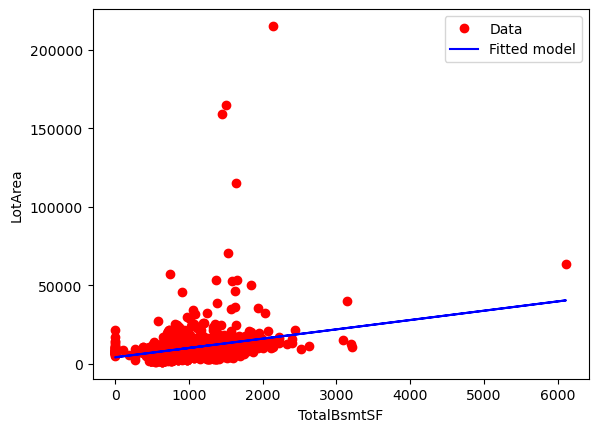

In [27]:
plt.plot(df['TotalBsmtSF'].values, df['LotArea'].values,'ro')
plt.plot(df['TotalBsmtSF'].values ,model2.fittedvalues.values,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('LotArea')

In [38]:
model2.pvalues

const          1.603215e-10
TotalBsmtSF    3.911258e-24
dtype: float64

##### Interpretation:

R-squared: 0.068 indicates that the model explains only 6.8% of the variance in LotArea (Weak Positive Correlation).

Coefficients (coef): const (4241.64) is the intercept of regression equation, and TotalBsmtSF (5.93) is the slope. For each additional square foot of TotalBsmtSF (Total Basement Area), the LotArea increases by 5.93 square feet.

P-values: The p-value for TotalBsmtSF is 3.911258e-24, indicating that there is a linear relationship (p < 0.05).

### Question 03

In [48]:
#Correlation between GrLivArea and SalePrice
print("Correlation between GrLivArea and SalePrice:", df['GrLivArea'].corr(df['SalePrice']))

#Correlation between TotalBsmtSF and LotArea
print("Correlation between TotalBsmtSF and LotArea:", df['TotalBsmtSF'].corr(df['LotArea']))

Correlation between GrLivArea and SalePrice: 0.7086244776126522
Correlation between TotalBsmtSF and LotArea: 0.2608331345451575


##### Interpretation:

0.708 indicates a strong positive correlation between GrLivArea and SalePrice. As the living area increases, the house price tends to increase significantly, with a correlation of approximately 0.71. We can confirm this from the scatterplot as there is close alignment of data points with the regression line in the graph.

0.260 suggests a weak positive correlation between Total Basement Area and LotArea. While there is some relationship, it is much weaker, implying that an increase in basement area is only loosely associated with an increase in lot size. We can confirm this from the scatterplot where data points do not conform to the regression line.

### Question 04

In [63]:
X = df.drop(['SalePrice'],axis=1)
Y = df['SalePrice']
X = sm.add_constant(X)
X.head()

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition
0,1.0,8450,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal
1,1.0,9600,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal
2,1.0,11250,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal
3,1.0,9550,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml
4,1.0,14260,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal


In [65]:
X = pd.get_dummies(X, columns = ['SaleCondition', 'PavedDrive'], dtype=int)
X

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageCars,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1.0,8450,7,5,2003,856,856,854,1710,1,...,2,0,0,0,0,1,0,0,0,1
1,1.0,9600,6,8,1976,1262,1262,0,1262,0,...,2,0,0,0,0,1,0,0,0,1
2,1.0,11250,7,5,2001,920,920,866,1786,1,...,2,0,0,0,0,1,0,0,0,1
3,1.0,9550,7,5,1915,756,961,756,1717,1,...,3,1,0,0,0,0,0,0,0,1
4,1.0,14260,8,5,2000,1145,1145,1053,2198,1,...,3,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,7917,6,5,1999,953,953,694,1647,0,...,2,0,0,0,0,1,0,0,0,1
1456,1.0,13175,6,6,1978,1542,2073,0,2073,1,...,2,0,0,0,0,1,0,0,0,1
1457,1.0,9042,7,9,1941,1152,1188,1152,2340,0,...,1,0,0,0,0,1,0,0,0,1
1458,1.0,9717,5,6,1950,1078,1078,0,1078,1,...,1,0,0,0,0,1,0,0,0,1


In [67]:
modelall = sm.OLS(Y,X).fit()
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     255.0
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:47:14   Log-Likelihood:                -17357.
No. Observations:                1460   AIC:                         3.476e+04
Df Residuals:                    1436   BIC:                         3.489e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.947e+05    7.3e+04     -6.780      0.000   -6.38e+05   -3.52e+05
LotArea                   0.4440      0.102      4.365      0.000       0.244       0.644
OverallQual            1.692e+04   1177.941     14.367      0.000    1.46e+04    1.92e+04
OverallCond            6039.0894    956.584      6.313      0.000    4162.637    7915.541
YearBuilt               341.6491     56.102      6.090      0.000     231.598     451.700
TotalBsmtSF              12.9967      4.158      3.126      0.002       4.841      21.153
1stFlrSF                 36.2027     20.439      1.771      0.077      -3.891      76.297
2ndFlrSF                 25.9362     20.177      1.285      0.199     -13.643      65.515
GrLivArea                30.7754     19.778      1.556      0.120      -8.021      69.572
BsmtFullBath           1.383e+04   2034.384      6.798      0.000    9839.087    1.78e+04
BsmtHalfBath           5091.5630   4051.182      1.257      0.209   -2855.307     1.3e+04
FullBath               2350.7552   2825.817      0.832      0.406   -3192.416    7893.927
HalfBath               -138.2292   2692.136     -0.051      0.959   -5419.170    5142.712
BedroomAbvGr          -5317.9224   1482.744     -3.587      0.000   -8226.498   -2409.346
KitchenAbvGr          -2.131e+04   4855.873     -4.388      0.000   -3.08e+04   -1.18e+04
Fireplaces             5008.3921   1771.339      2.827      0.005    1533.703    8483.081
GarageCars             1.259e+04   1732.280      7.267      0.000    9189.770     1.6e+04
SaleCondition_Abnorml -9.189e+04   1.28e+04     -7.157      0.000   -1.17e+05   -6.67e+04
SaleCondition_AdjLand  -7.13e+04   1.96e+04     -3.647      0.000    -1.1e+05   -3.29e+04
SaleCondition_Alloca  -8.899e+04   1.57e+04     -5.651      0.000    -1.2e+05   -5.81e+04
SaleCondition_Family  -9.712e+04    1.4e+04     -6.914      0.000   -1.25e+05   -6.96e+04
SaleCondition_Normal  -8.492e+04   1.27e+04     -6.692      0.000    -1.1e+05      -6e+04
SaleCondition_Partial -6.052e+04   1.35e+04     -4.475      0.000    -8.7e+04    -3.4e+04
PavedDrive_N          -1.604e+05    2.4e+04     -6.681      0.000   -2.07e+05   -1.13e+05
PavedDrive_P          -1.692e+05   2.46e+04     -6.881      0.000   -2.17e+05   -1.21e+05
PavedDrive_Y          -1.652e+05   2.52e+04     -6.555      0.000   -2.15e+05   -1.16e+05
==============================================================================
Omnibus:                      755.660   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139793.792
Skew:                          -1.296   Prob(JB):                         0.00
Kurtosis:                      50.867   Cond. No.                     5.88e+17
==============================================================================

In [69]:
modelall.pvalues

const                    1.748584e-11
LotArea                  1.360238e-05
OverallQual              7.800179e-44
OverallCond              3.635293e-10
YearBuilt                1.448894e-09
TotalBsmtSF              1.808700e-03
1stFlrSF                 7.673325e-02
2ndFlrSF                 1.988429e-01
GrLivArea                1.199107e-01
BsmtFullBath             1.550604e-11
BsmtHalfBath             2.090272e-01
FullBath                 4.056121e-01
HalfBath                 9.590573e-01
BedroomAbvGr             3.463315e-04
KitchenAbvGr             1.227827e-05
Fireplaces               4.756968e-03
GarageCars               6.026648e-13
SaleCondition_Abnorml    1.307567e-12
SaleCondition_AdjLand    2.748268e-04
SaleCondition_Alloca     1.920894e-08
SaleCondition_Family     7.062461e-12
SaleCondition_Normal     3.154105e-11
SaleCondition_Partial    8.257454e-06
PavedDrive_N             3.388581e-11
PavedDrive_P             8.871643e-12
PavedDrive_Y             7.718488e-11
dtype: float

##### Interpretation:

R-squared: 0.803 indicates that the model explains 80.3% of the variance in the dependent variable SalePrice. There is a strong correlation and turns out to be an accurate model when we use all the other factors as inputs to predict SalePrice. Correlation value turns out to be ~0.9.

3 Most Significant Inputs which have the most impact (lowest p-values):  
OverallQual: 7.800179e-44  
GarageCars: 6.026648e-13  
SaleCondition_Abnorml: 1.307567e−12  
 
3 Least Significant Inputs which have the lowest impact (highest p-values):  
HalfBath: 9.590573e−1  
FullBath: 4.056121e−1  
BsmtHalfBath: 2.090272e−1

In [93]:
#Save the model to disk
filename = 'regmodelhouseprice.pkl'
pickle.dump(modelall, open(filename, 'wb'))

In [95]:
#Load the model from disk
loaded_model = pickle.load(open('regmodelhouseprice.pkl', 'rb'))

In [97]:
new_input = pd.DataFrame({'const': [1.0],
                          'LotArea': [11000], 
                          'OverallQual': [9], 
                          'OverallCond': [8], 
                          'YearBuilt': [2010],
                          'TotalBsmtSF': [1700], 
                          '1stFlrSF': [1750], 
                          '2ndFlrSF': [1750], 
                          'GrLivArea': [3500], 
                          'BsmtFullBath': [1],
                          'BsmtHalfBath': [0], 
                          'FullBath': [2], 
                          'HalfBath': [0], 
                          'BedroomAbvGr': [5], 
                          'KitchenAbvGr': [2],
                          'Fireplaces': [1], 
                          'GarageCars': [3], 
                          'SaleCondition_Abnorml': [0],
                          'SaleCondition_AdjLand': [0], 
                          'SaleCondition_Alloca': [0], 
                          'SaleCondition_Family': [0],
                          'SaleCondition_Normal': [1], 
                          'SaleCondition_Partial': [0], 
                          'PavedDrive_N': [0],
                          'PavedDrive_P': [0], 
                          'PavedDrive_Y': [1]})

In [99]:
#Predicting SalePrice for new data using saved model
loaded_model.predict(new_input)

0    378050.417866
dtype: float64

##### Interpretation:
For the new house, the predicted SalePrice is 378050.417866 using our regression model.

### Question 05

In [103]:
X1 = df.drop(['LotArea'],axis=1)
Y1 = df['LotArea']
X1 = sm.add_constant(X1)
X1 = pd.get_dummies(X1, columns = ['SaleCondition', 'PavedDrive'], dtype=int)
X1.head()

,const,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SalePrice,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1.0,7,5,2003,856,856,854,1710,1,0,...,208500,0,0,0,0,1,0,0,0,1
1,1.0,6,8,1976,1262,1262,0,1262,0,1,...,181500,0,0,0,0,1,0,0,0,1
2,1.0,7,5,2001,920,920,866,1786,1,0,...,223500,0,0,0,0,1,0,0,0,1
3,1.0,7,5,1915,756,961,756,1717,1,0,...,140000,1,0,0,0,0,0,0,0,1
4,1.0,8,5,2000,1145,1145,1053,2198,1,0,...,250000,0,0,0,0,1,0,0,0,1


In [105]:
modelall2 = sm.OLS(Y1,X1).fit()
modelall2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     13.01
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           8.65e-45
Time:                        20:56:46   Log-Likelihood:                -15377.
No. Observations:                1460   AIC:                         3.080e+04
Df Residuals:                    1436   BIC:                         3.093e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.331e+04   1.91e+04      2.271      0.023    5902.290    8.07e+04
OverallQual           -1893.6453    320.810     -5.903      0.000   -2522.952   -1264.339
OverallCond             -81.4211    249.930     -0.326      0.745    -571.688     408.845
YearBuilt               -29.0314     14.625     -1.985      0.047     -57.719      -0.343
TotalBsmtSF               1.9934      1.074      1.856      0.064      -0.113       4.100
1stFlrSF                  5.4271      5.272      1.029      0.303      -4.914      15.768
2ndFlrSF                  3.2060      5.202      0.616      0.538      -6.999      13.411
GrLivArea                -1.7279      5.101     -0.339      0.735     -11.735       8.279
BsmtFullBath           1710.6717    530.777      3.223      0.001     669.491    2751.852
BsmtHalfBath           2038.1382   1043.302      1.954      0.051      -8.422    4084.698
FullBath                458.7982    728.374      0.630      0.529    -969.994    1887.590
HalfBath               -527.2643    693.707     -0.760      0.447   -1888.052     833.523
BedroomAbvGr            536.6054    383.595      1.399      0.162    -215.861    1289.072
KitchenAbvGr          -2310.8834   1258.392     -1.836      0.067   -4779.368     157.601
Fireplaces             2219.8838    454.034      4.889      0.000    1329.243    3110.524
GarageCars              559.8016    454.356      1.232      0.218    -331.471    1451.074
SalePrice                 0.0295      0.007      4.365      0.000       0.016       0.043
SaleCondition_Abnorml  7294.3343   3361.770      2.170      0.030     699.828    1.39e+04
SaleCondition_AdjLand  6914.6106   5058.800      1.367      0.172   -3008.819    1.68e+04
SaleCondition_Alloca   7593.4146   4098.862      1.853      0.064    -446.984    1.56e+04
SaleCondition_Family   6751.5498   3675.619      1.837      0.066    -458.608     1.4e+04
SaleCondition_Normal   7791.1782   3314.989      2.350      0.019    1288.439    1.43e+04
SaleCondition_Partial  6966.6380   3504.950      1.988      0.047      91.266    1.38e+04
PavedDrive_N            1.48e+04   6270.666      2.359      0.018    2494.621    2.71e+04
PavedDrive_P           1.493e+04   6428.733      2.322      0.020    2316.301    2.75e+04
PavedDrive_Y           1.359e+04   6580.330      2.065      0.039     681.353    2.65e+04
==============================================================================
Omnibus:                     2614.176   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2806522.416
Skew:                          12.394   Prob(JB):                         0.00
Kurtosis:                     216.355   Cond. No.                     4.09e+17
==============================================================================

In [107]:
modelall2.pvalues

const                    2.328767e-02
OverallQual              4.455178e-09
OverallCond              7.446413e-01
YearBuilt                4.732388e-02
TotalBsmtSF              6.363624e-02
1stFlrSF                 3.034238e-01
2ndFlrSF                 5.378269e-01
GrLivArea                7.348783e-01
BsmtFullBath             1.297222e-03
BsmtHalfBath             5.094898e-02
FullBath                 5.288646e-01
HalfBath                 4.473389e-01
BedroomAbvGr             1.620633e-01
KitchenAbvGr             6.650849e-02
Fireplaces               1.125990e-06
GarageCars               2.181220e-01
SalePrice                1.360238e-05
SaleCondition_Abnorml    3.018630e-02
SaleCondition_AdjLand    1.718869e-01
SaleCondition_Alloca     6.414958e-02
SaleCondition_Family     6.643903e-02
SaleCondition_Normal     1.889359e-02
SaleCondition_Partial    4.703934e-02
PavedDrive_N             1.843569e-02
PavedDrive_P             2.037643e-02
PavedDrive_Y             3.908688e-02
dtype: float

##### Interpretation:

R-squared: 0.172 indicates that the model explains only 17.2% of the variance in the dependent variable. This suggests a weak correlation, meaning the model is not very effective at explaining or predicting the outcome based on the input factors. The correlation value is relatively low, around 0.41, implying that other unaccounted variables may significantly influence the dependent variable.

3 Most Significant Inputs having the highest impact (lowest p-values):  
OverallQual: 4.455178e−9  
Fireplaces: 1.125990e−6  
SalePrice: 1.360238e−5  
 
3 Least Significant Inputs having the lowest impact (highest p-values):  
OverallCond: 7.446413e−1  
GrLivArea: 7.348783e−1  
2ndFlrSF: 5.378269e−1

In [118]:
#Save the model to disk
filename = 'regmodellotarea.pkl'
pickle.dump(modelall2, open(filename, 'wb'))

In [120]:
new_input2 = pd.DataFrame({'const': [1.0], 
                          'OverallQual': [9], 
                          'OverallCond': [8], 
                          'YearBuilt': [2010],
                          'TotalBsmtSF': [1700], 
                          '1stFlrSF': [1750], 
                          '2ndFlrSF': [1750], 
                          'GrLivArea': [3500], 
                          'BsmtFullBath': [1],
                          'BsmtHalfBath': [0], 
                          'FullBath': [2], 
                          'HalfBath': [0], 
                          'BedroomAbvGr': [5], 
                          'KitchenAbvGr': [2],
                          'Fireplaces': [1], 
                          'GarageCars': [3],
                          'SalePrice': [378050.417866],
                          'SaleCondition_Abnorml': [0],
                          'SaleCondition_AdjLand': [0], 
                          'SaleCondition_Alloca': [0], 
                          'SaleCondition_Family': [0],
                          'SaleCondition_Normal': [1], 
                          'SaleCondition_Partial': [0], 
                          'PavedDrive_N': [0],
                          'PavedDrive_P': [0], 
                          'PavedDrive_Y': [1]})

In [122]:
#Load the model from disk
loaded_model2 = pickle.load(open('regmodellotarea.pkl', 'rb'))

In [124]:
#Predicting SalePrice for new data using saved model
loaded_model2.predict(new_input2)

0    16833.474765
dtype: float64

##### Interpretation:
For the new house, the predicted LotArea is 16833.474765 using our regression model.

### Question 06

The columns with p-values greater than 0.05:

1stFlrSF: 0.076733  
2ndFlrSF: 0.198843  
GrLivArea: 0.119911  
BsmtHalfBath: 0.209027  
FullBath: 0.405612  
HalfBath: 0.959057  

Dropping these from the model of Q4 to create a new model.

In [132]:
X = X.drop(['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath'],axis=1)
X.head()

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1.0,8450,7,5,2003,856,1,3,1,0,2,0,0,0,0,1,0,0,0,1
1,1.0,9600,6,8,1976,1262,0,3,1,1,2,0,0,0,0,1,0,0,0,1
2,1.0,11250,7,5,2001,920,1,3,1,1,2,0,0,0,0,1,0,0,0,1
3,1.0,9550,7,5,1915,756,1,3,1,1,3,1,0,0,0,0,0,0,0,1
4,1.0,14260,8,5,2000,1145,1,4,1,1,3,0,0,0,0,1,0,0,0,1


In [134]:
modelall3 = sm.OLS(Y,X).fit()
modelall3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     258.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:06:04   Log-Likelihood:                -17524.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1442   BIC:                         3.518e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.244e+05   7.03e+04     -4.617      0.000   -4.62e+05   -1.87e+05
LotArea                   0.6879      0.113      6.112      0.000       0.467       0.909
OverallQual             2.63e+04   1172.051     22.435      0.000     2.4e+04    2.86e+04
OverallCond            5003.4352   1056.883      4.734      0.000    2930.242    7076.628
YearBuilt               188.4952     53.575      3.518      0.000      83.402     293.588
TotalBsmtSF              29.0364      3.123      9.297      0.000      22.910      35.163
BsmtFullBath           1.207e+04   2200.508      5.486      0.000    7754.908    1.64e+04
BedroomAbvGr           9735.2845   1368.080      7.116      0.000    7051.645    1.24e+04
KitchenAbvGr          -4621.8269   5200.420     -0.889      0.374   -1.48e+04    5579.372
Fireplaces             1.453e+04   1873.409      7.757      0.000    1.09e+04    1.82e+04
GarageCars             1.898e+04   1892.292     10.030      0.000    1.53e+04    2.27e+04
SaleCondition_Abnorml -6.118e+04   1.23e+04     -4.955      0.000   -8.54e+04    -3.7e+04
SaleCondition_AdjLand -4.677e+04    2.1e+04     -2.226      0.026    -8.8e+04   -5555.581
SaleCondition_Alloca  -5.117e+04    1.6e+04     -3.204      0.001   -8.25e+04   -1.98e+04
SaleCondition_Family  -7.729e+04   1.41e+04     -5.490      0.000   -1.05e+05   -4.97e+04
SaleCondition_Normal  -5.708e+04   1.23e+04     -4.640      0.000   -8.12e+04   -3.29e+04
SaleCondition_Partial -3.089e+04   1.33e+04     -2.321      0.020    -5.7e+04   -4781.637
PavedDrive_N          -1.014e+05   2.31e+04     -4.392      0.000   -1.47e+05   -5.61e+04
PavedDrive_P          -1.148e+05   2.37e+04     -4.841      0.000   -1.61e+05   -6.83e+04
PavedDrive_Y          -1.081e+05   2.45e+04     -4.413      0.000   -1.56e+05   -6.01e+04
==============================================================================
Omnibus:                      634.582   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28283.258
Skew:                           1.287   Prob(JB):                         0.00
Kurtosis:                      24.408   Cond. No.                     3.06e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.32e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Interpretation:

Model with All Inputs: R-squared = 0.803  
Model with Few Inputs (Regularized): R-squared = 0.753  

While the initial model with all inputs has a higher R-squared of 0.803, the model with fewer inputs still performs well with an R-squared of 0.753. Despite the slight decrease in R-squared, the new model is preferable because of its simplicity and better generalization. By using fewer, more relevant predictors, the model avoids overfitting, which is often addressed through regularization techniques (e.g., Lasso or Ridge). Regularization helps improve the model's robustness by penalizing overly complex models, ensuring it captures the true patterns in the data rather than noise.

In [149]:
#Save the model to disk
filename = 'regmodelsalepricenew.pkl'
pickle.dump(modelall3, open(filename, 'wb'))

### Question 07

In [152]:
new_input4 = pd.DataFrame({
    'const': [1.0, 1.0, 1.0],
    'LotArea': [12000, 8500, 15000],
    'OverallQual': [7, 5, 8],
    'OverallCond': [6, 5, 8],
    'YearBuilt': [2010, 1995, 2018],
    'TotalBsmtSF': [1200, 800, 1400],
    'BsmtFullBath': [1, 0, 2],
    'BedroomAbvGr': [4, 3, 5],
    'KitchenAbvGr': [1, 1, 1],
    'Fireplaces': [2, 1, 3],
    'GarageCars': [3, 2, 2],
    'SaleCondition_Abnorml': [0, 0, 0],
    'SaleCondition_AdjLand': [0, 0, 0],
    'SaleCondition_Alloca': [0, 0, 0],
    'SaleCondition_Family': [1, 0, 0],
    'SaleCondition_Normal': [0, 1, 1],
    'SaleCondition_Partial': [0, 0, 0],
    'PavedDrive_N': [0, 1, 0],
    'PavedDrive_P': [0, 0, 0],
    'PavedDrive_Y': [1, 0, 1]
})

In [154]:
modelall3.predict(new_input4)

0    258688.035937
1    155823.252584
2    341939.582950
dtype: float64

##### Interpretation:

The predicted SalePrices appear reasonable based on the model's input features for the houses. Each predicted price aligns logically with the characteristics of the respective properties, suggesting the model is functioning as expected.  
258688.04: This prediction likely corresponds to a well-sized home with good overall quality, reflecting its higher value.  
155823.25: The lower predicted price indicates a smaller or lower-quality home, consistent with the reduced value.  
341939.58: This higher prediction suggests a large, high-end property with desirable features that contribute to its elevated price.